In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
import scipy.fftpack

In [43]:
data_file = "/home/kristjan/work/cnt_calculations/exp_analysis/eval_dir/dIdVn10m4Lval16twodefectsnotinalineHighResolution.dat"

data = np.loadtxt(data_file)

L = 16.0
dx = L/np.shape(data)[1]
dk = np.pi/L

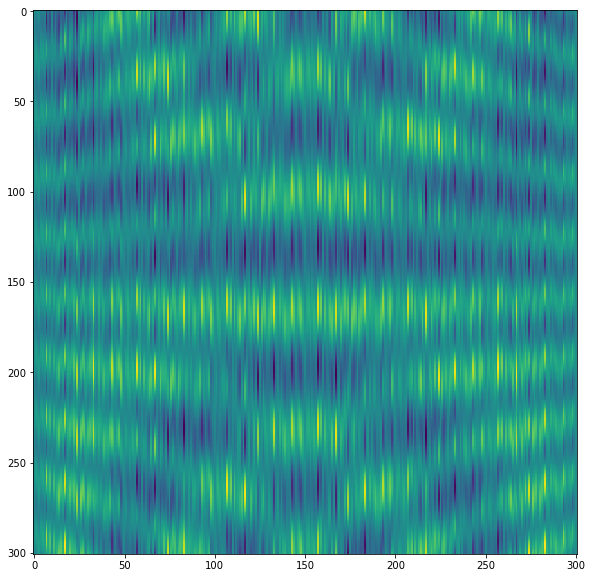

In [44]:
plt.figure(figsize=(10, 10))
plt.imshow(data)
plt.show()

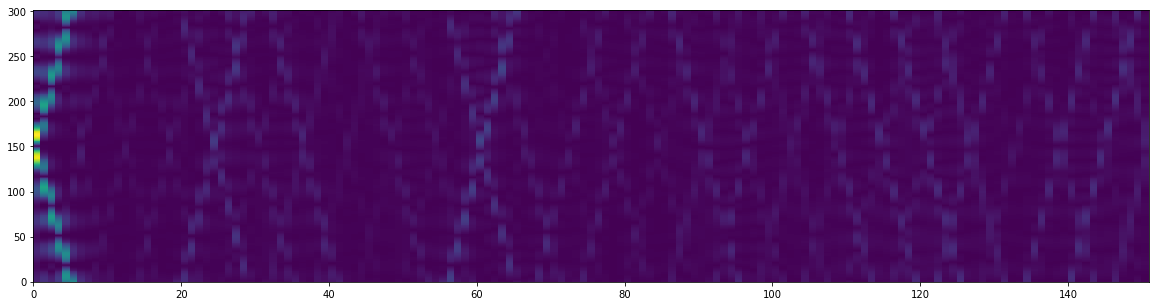

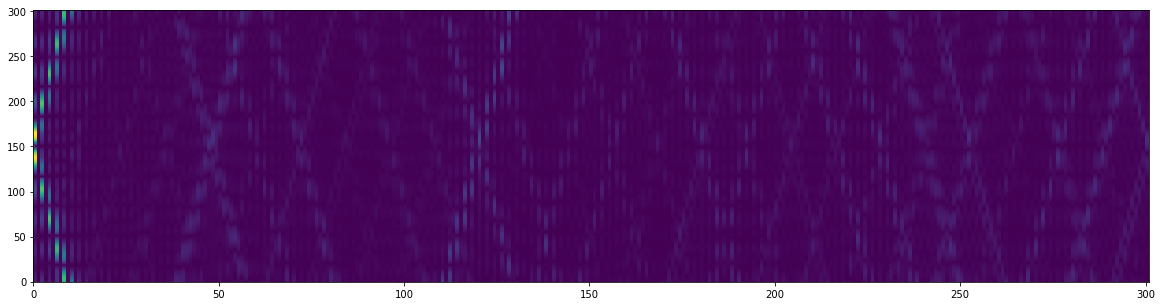

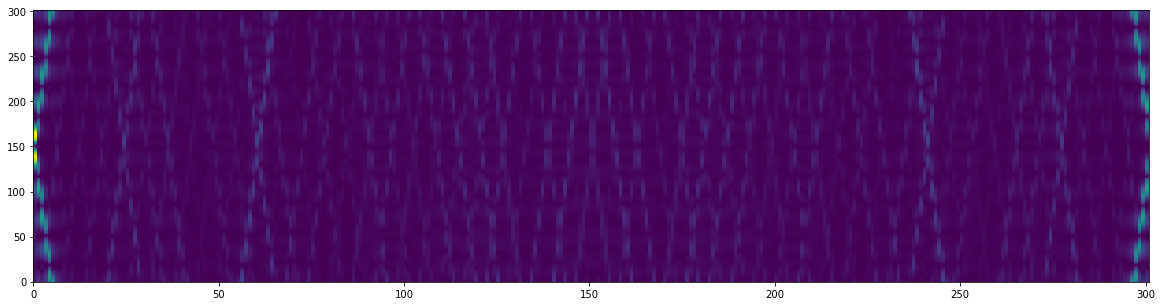

In [53]:
ft = np.fft.rfft(data, axis=1)
aft = np.abs(ft)

plt.figure(figsize=(20, 5))
plt.pcolormesh(aft)
plt.show()

dst = sp.fftpack.dst(data, axis=1)
dct = sp.fftpack.dct(data, axis=1)
sc_ft = np.sqrt(dst**2 + dct**2)

plt.figure(figsize=(20, 5))
plt.pcolormesh(sc_ft)
plt.show()

ft = np.fft.fft(data, axis=1)
aft = np.abs(ft)

plt.figure(figsize=(20, 5))
plt.pcolormesh(aft)
plt.show()

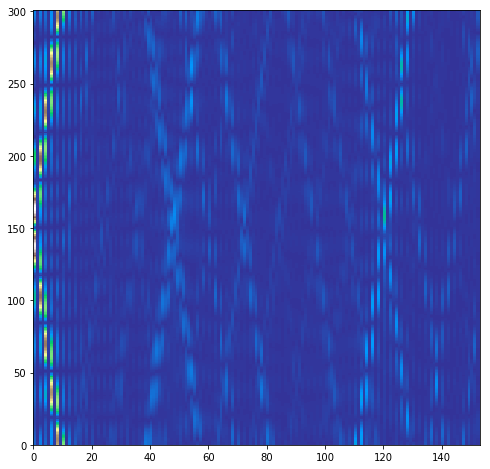

In [51]:
# up to k = 30 nm^-1
nred = int(np.round(30/dk))

plt.figure(figsize=(8, 8))
plt.pcolormesh(sc_ft[:, :nred], cmap='terrain')
plt.show()

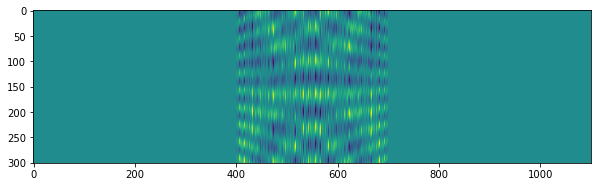

In [74]:
# padding

padding_n = 400

padded_data = np.zeros((np.shape(data)[0], np.shape(data)[1]+2*padding_n))
padded_data[:, padding_n:-padding_n] = data

plt.figure(figsize=(10, 18))
plt.imshow(padded_data)
plt.show()

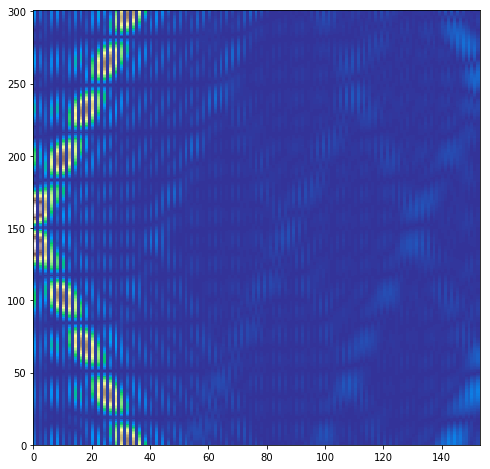

In [75]:
dst = sp.fftpack.dst(padded_data, axis=1)
dct = sp.fftpack.dct(padded_data, axis=1)
sc_ft = np.sqrt(dst**2 + dct**2)

# up to k = 30 nm^-1
nred = int(np.round(30/dk))

plt.figure(figsize=(8, 8))
plt.pcolormesh(sc_ft[:, :nred], cmap='terrain')
plt.show()